In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading train datasets
df1 = pd.read_csv(r"C:\Users\yashika\Desktop\miniproject\Train.csv")
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [4]:
#loading test datasets
df2 = pd.read_csv(r"C:\Users\yashika\Desktop\miniproject\Test.csv")
df2

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [14]:
df1.shape

(8523, 12)

In [15]:
df2.shape

(5681, 11)

In [18]:
#checking null values in train data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
df1.Outlet_Size.mode()

0    Medium
Name: Outlet_Size, dtype: object

In [20]:
df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0])
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

<Axes: >

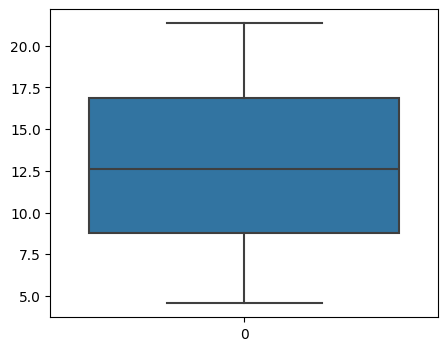

In [23]:
fig,ax=plt.subplots(figsize=(5,4))
sns.boxplot(df1.Item_Weight)

In [25]:
df1['Item_Weight'] = df1['Item_Weight'].fillna(df1['Item_Weight'].mean())
df1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
#checking null values for test data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [30]:
df2['Outlet_Size']=df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])
df2

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58    20.750000          Low Fat         0.007565   
1              FDW14     8.300000              reg         0.038428   
2              NCN55    14.600000          Low Fat         0.099575   
3              FDQ58     7.315000          Low Fat         0.015388   
4              FDY38    12.857645          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58    10.500000          Regular         0.013496   
5677           FDD47     7.600000          Regular         0.142991   
5678           NCO17    10.000000          Low Fat         0.073529   
5679           FDJ26    15.300000          Regular         0.000000   
5680           FDU37     9.500000          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007      Medium               Tier 2   
2                          1998      Medium               Tier 3   
3                          2007      Medium               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002      Medium               Tier 2   
5679                       2007      Medium               Tier 2   
5680                       2002      Medium               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

<Axes: >

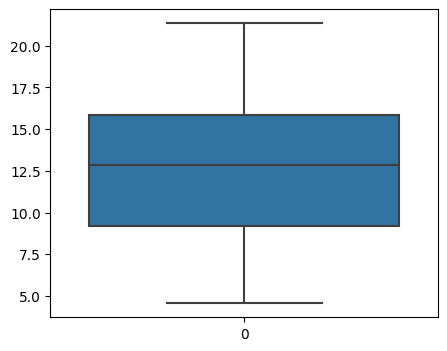

In [31]:
fig,ax=plt.subplots(figsize=(5,4))
sns.boxplot(df2.Item_Weight)

In [32]:
df2['Item_Weight'] = df2['Item_Weight'].fillna(df2['Item_Weight'].mean())
df2

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58    20.750000          Low Fat         0.007565   
1              FDW14     8.300000              reg         0.038428   
2              NCN55    14.600000          Low Fat         0.099575   
3              FDQ58     7.315000          Low Fat         0.015388   
4              FDY38    12.857645          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58    10.500000          Regular         0.013496   
5677           FDD47     7.600000          Regular         0.142991   
5678           NCO17    10.000000          Low Fat         0.073529   
5679           FDJ26    15.300000          Regular         0.000000   
5680           FDU37     9.500000          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007      Medium               Tier 2   
2                          1998      Medium               Tier 3   
3                          2007      Medium               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002      Medium               Tier 2   
5679                       2007      Medium               Tier 2   
5680                       2002      Medium               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [34]:
#data exploration
#some data values are repeating
df1['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
df2['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)


In [35]:
df1.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [36]:
df2.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [37]:
#data visualization
outlet_type_sales = df1.groupby("Outlet_Type")[["Item_Outlet_Sales"]].sum()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
outlet_type_sales.sort_values(by=['Item_Outlet_Sales'],ascending=[False]).reset_index()

Outlet_Type  Item_Outlet_Sales
0  Supermarket Type1       12917342.263
1  Supermarket Type3        3453926.051
2  Supermarket Type2        1851822.830
3      Grocery Store         368034.266

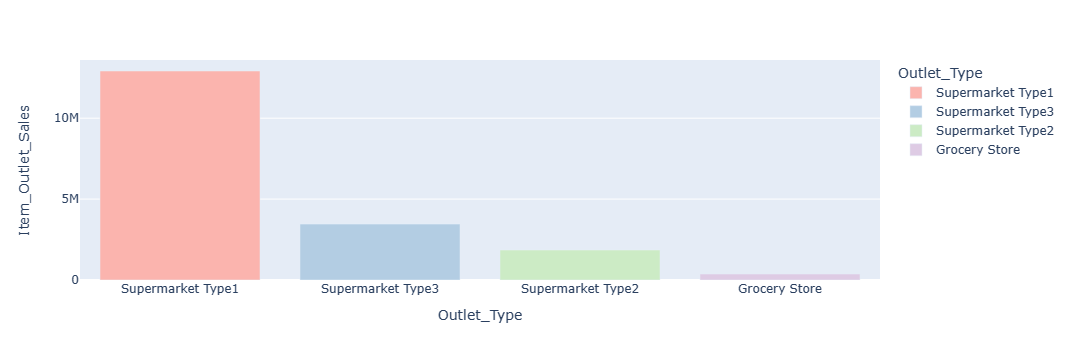

In [38]:
data = df1.groupby("Outlet_Type")[["Item_Outlet_Sales"]].sum().sort_values(by=['Item_Outlet_Sales'],ascending=[False]).reset_index()
px.bar(data, x= 'Outlet_Type', y="Item_Outlet_Sales",color='Outlet_Type',color_discrete_sequence=px.colors.qualitative.Pastel1)

In [39]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
location_type_sales = df1.groupby("Outlet_Location_Type")[["Item_Outlet_Sales"]].sum().reset_index()
location_type_sales.sort_values(by=['Item_Outlet_Sales'],ascending=[False])

Outlet_Location_Type  Item_Outlet_Sales
2               Tier 3        7636752.632
1               Tier 2        6472313.706
0               Tier 1        4482059.072

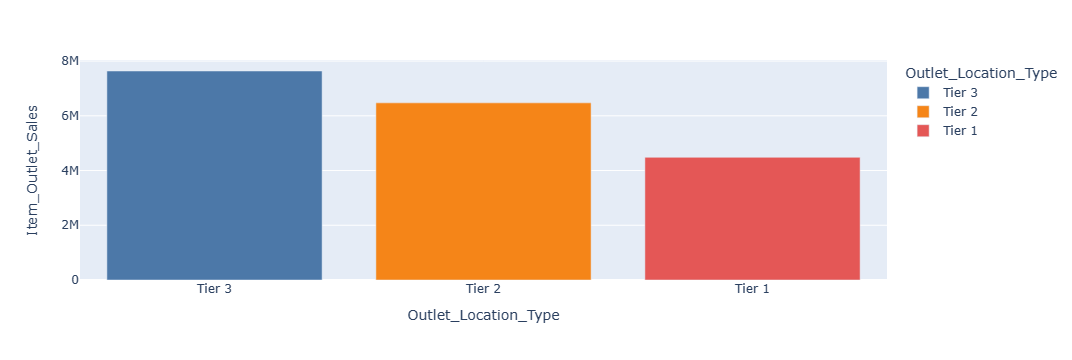

In [40]:
data = df1.groupby("Outlet_Location_Type")[["Item_Outlet_Sales"]].sum().sort_values(by=['Item_Outlet_Sales'],ascending=[False]).reset_index()
px.bar(data, x= 'Outlet_Location_Type', y="Item_Outlet_Sales",color='Outlet_Location_Type',color_discrete_sequence=px.colors.qualitative.T10)

In [41]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
outlet_size_sales = df1.groupby("Outlet_Size")[["Item_Outlet_Sales"]].sum().reset_index()
outlet_size_sales.sort_values(by=['Item_Outlet_Sales'],ascending=[False])

Outlet_Size  Item_Outlet_Sales
1      Medium       11882249.635
2       Small        4566212.197
0        High        2142663.578

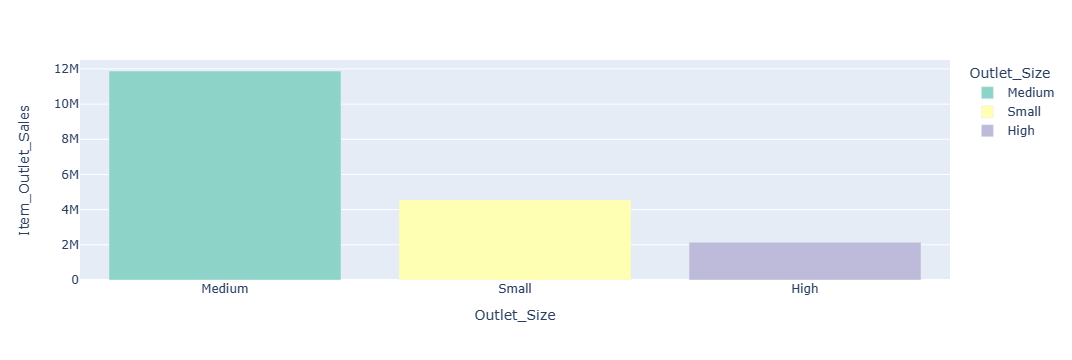

In [42]:
data = df1.groupby("Outlet_Size")[["Item_Outlet_Sales"]].sum().sort_values(by=['Item_Outlet_Sales'],ascending=[False]).reset_index()
px.bar(data, x= 'Outlet_Size', y="Item_Outlet_Sales",color='Outlet_Size',color_discrete_sequence=px.colors.qualitative.Set3)

In [56]:
df.groupby("Item_Type")[["Item_Outlet_Sales"]].max().sort_values(by=['Item_Outlet_Sales'],ascending=[False]).reset_index()

Item_Type  Item_Outlet_Sales
0               Household          13086.965
1   Fruits and Vegetables          12117.560
2             Snack Foods          10993.690
3                  Canned          10306.584
4                   Dairy          10256.649
5      Health and Hygiene           9779.936
6            Frozen Foods           9678.069
7             Soft Drinks           9554.230
8                    Meat           9390.443
9                  Breads           8958.339
10              Breakfast           8209.314
11          Starchy Foods           8132.081
12           Baking Goods           7931.675
13            Hard Drinks           7843.124
14                Seafood           6503.534
15                 Others           6008.845

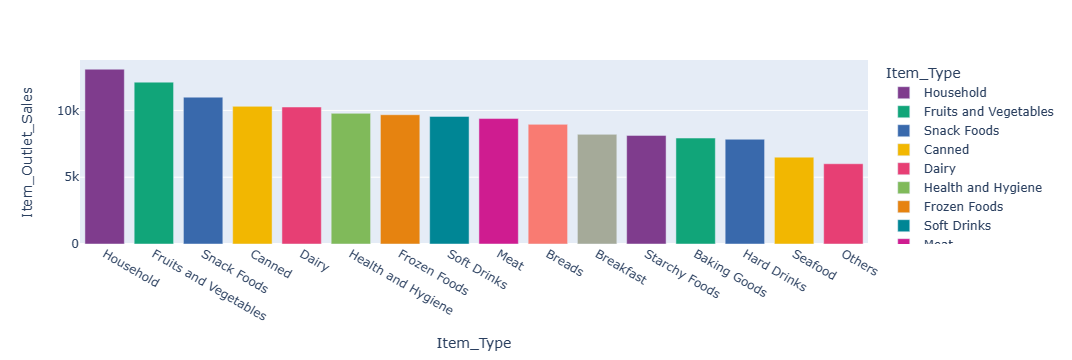

In [57]:
data=df.groupby("Item_Type")[["Item_Outlet_Sales"]].max().sort_values(by=['Item_Outlet_Sales'],ascending=[False]).reset_index()
px.bar(data, x= 'Item_Type', y="Item_Outlet_Sales",color='Item_Type',color_discrete_sequence=px.colors.qualitative.Bold)

In [58]:
df1.drop(df1.loc[df1['Item_Visibility']==0].index, inplace=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
item_visibility_sales = df1.groupby("Item_Visibility")[["Item_Outlet_Sales"]].sum().sort_values(by=['Item_Outlet_Sales'],ascending=[False]).reset_index()
item_visibility_sales.sort_values(by=['Item_Outlet_Sales'],ascending=[False])

Item_Visibility  Item_Outlet_Sales
0               0.011          13086.965
1               0.014          12117.560
2               0.072          11738.054
3               0.060          11593.575
4               0.074          11424.462
...               ...                ...
7874            0.025             36.619
7875            0.282             35.287
7876            0.073             34.622
7877            0.134             33.956
7878            0.064             33.290

[7879 rows x 2 columns]

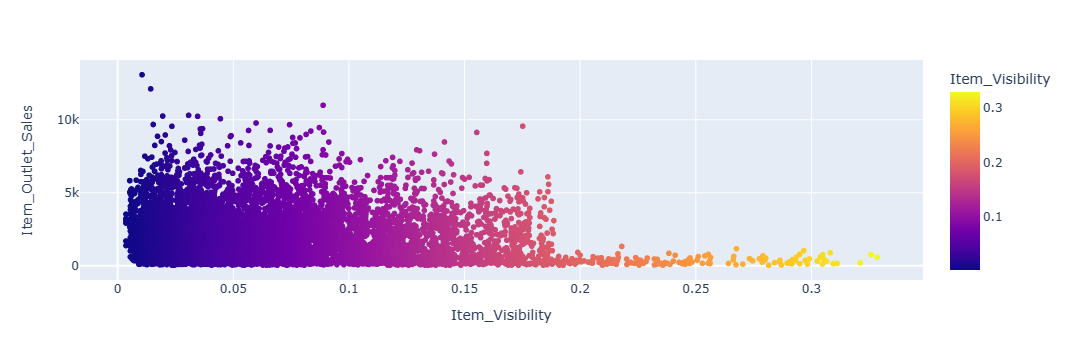

In [59]:
fig = px.scatter(df1,x='Item_Visibility', y='Item_Outlet_Sales',color='Item_Visibility')
fig.show()

In [60]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
item_visibility_sales = df1.groupby("Item_Weight")[["Item_Outlet_Sales"]].sum().sort_values(by=['Item_Outlet_Sales'],ascending=[False]).reset_index()
item_visibility_sales.sort_values(by=['Item_Outlet_Sales'],ascending=[False])

Item_Weight  Item_Outlet_Sales
0         12.858        3402618.172
1         12.150         186784.198
2         15.100         170976.774
3         17.600         167844.185
4         18.850         155171.348
..           ...                ...
411        6.905           1370.216
412        9.420            866.872
413        6.400            743.033
414        9.105            332.900
415        6.440            199.740

[416 rows x 2 columns]

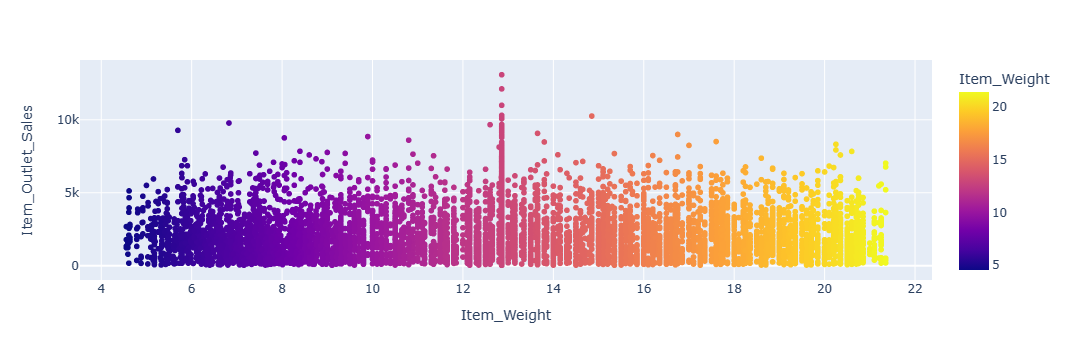

In [61]:
fig = px.scatter(df1,x='Item_Weight', y='Item_Outlet_Sales',color='Item_Weight')
fig.show()

In [62]:
df1.groupby("Item_MRP")[["Item_Outlet_Sales"]].max().sort_values(by=['Item_Outlet_Sales'],ascending=[False]).reset_index()

Item_MRP  Item_Outlet_Sales
0      234.996          13086.965
1      242.651          12117.560
2      254.267          10993.690
3      228.035          10306.584
4      261.291          10256.649
...        ...                ...
5695    37.651             37.951
5696    35.219             36.619
5697    33.887             35.287
5698    34.322             34.622
5699    35.056             33.956

[5700 rows x 2 columns]

In [63]:
df1.loc[df1['Item_MRP'] ==234.9958]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7060           FDX31       20.350          Regular            0.015   
7188           NCE42       12.858          Low Fat            0.011   

                  Item_Type  Item_MRP Outlet_Identifier  \
7060  Fruits and Vegetables   234.996            OUT013   
7188              Household   234.996            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7060                       1987        High               Tier 3   
7188                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7060  Supermarket Type1           5842.395  
7188  Supermarket Type3          13086.965

In [64]:
df1.loc[df1['Item_MRP'] ==31.290]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
153           DRK12       12.858          Low Fat            0.042   

       Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
153  Soft Drinks    31.290            OUT027                       1985   

    Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
153      Medium               Tier 3  Supermarket Type3            898.830

In [ ]:
#conclusions
#Sales have been made the most for:
#Supermarket Type 1
#Tier 3 cities
#Medium sized outlet
#Household Items
#Item weight 12.6 units

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#Feature analysis
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    df1[i] = le.fit_transform(df1[i])
    df2[i] = le.fit_transform(df2[i])

df1.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300                 0            0.016   
1           DRC01        5.920                 1            0.019   
2           FDN15       17.500                 0            0.017   
6           FDO10       13.650                 1            0.013   
7           FDP10       12.858                 0            0.127   

     Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0        Dairy   249.809            OUT049                       1999   
1  Soft Drinks    48.269            OUT018                       2009   
2         Meat   141.618            OUT049                       1999   
6  Snack Foods    57.659            OUT013                       1987   
7  Snack Foods   107.762            OUT027                       1985   

   Outlet_Size  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0            1                     0  Supermarket Type1           3735.138  
1            1                     2  Supermarket Type2            443.423  
2            1                     0  Supermarket Type1           2097.270  
6            0                     2  Supermarket Type1            343.553  
7            1                     2  Supermarket Type3           4022.764

In [70]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df1[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(df2[cols])).astype('int64')
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)
tr_oh.index = df1.index
te_oh.index = df2.index
tr_fe = pd.concat([df1, tr_oh], axis=1)
te_fe = pd.concat([df2, te_oh], axis=1)

In [71]:
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [72]:
tr_fe.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0        9.300                 0            0.016   249.809            1   
1        5.920                 1            0.019    48.269            1   
2       17.500                 0            0.017   141.618            1   
6       13.650                 1            0.013    57.659            0   
7       12.858                 0            0.127   107.762            1   

   Outlet_Location_Type  Item_Outlet_Sales  Item_Type_Baking Goods  \
0                     0           3735.138                       0   
1                     2            443.423                       0   
2                     0           2097.270                       0   
6                     2            343.553                       0   
7                     2           4022.764                       0   

   Item_Type_Breads  Item_Type_Breakfast  ...  Item_Type_Meat  \
0                 0                    0  ...               0   
1                 0                    0  ...               0   
2                 0                    0  ...               1   
6                 0                    0  ...               0   
7                 0                    0  ...               0   

   Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0                 0                  0                      0   
1                 0                  0                      0   
2                 0                  0                      0   
6                 0                  0                      1   
7                 0                  0                      1   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Type_Grocery Store  \
0                      0                        0                          0   
1                      1                        0                          0   
2                      0                        0                          0   
6                      0                        0                          0   
7                      0                        0                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
6                              1                              0   
7                              0                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
6                              0  
7                              1  

[5 rows x 27 columns]

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [85]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [86]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [87]:
LR = LinearRegression(normalize=True)
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'